In [1]:
import os
from Q3 import *
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
AUDIO_BASE_PATH = "Q3_Minor"

In [3]:
vow_data = VowelDataset(AUDIO_BASE_PATH, hamming_window)

In [4]:
len(vow_data)

60

In [5]:
vow_data[0][0].shape

torch.Size([1, 4413])

In [6]:
extract_f0(vow_data[0][0], vow_data[0][2])

np.float64(87.91208791208791)

In [7]:
extract_fundamental_features(vow_data[0][1], vow_data[0][2]).shape

torch.Size([1, 200])

Visualizations

In [8]:
vowel_map = {i:vow for i, vow in enumerate(['a', 'e', 'i', 'o', 'u'])}
color_map = {i:color for i, color in enumerate(['red', 'blue', 'green', 'purple', 'orange'])}

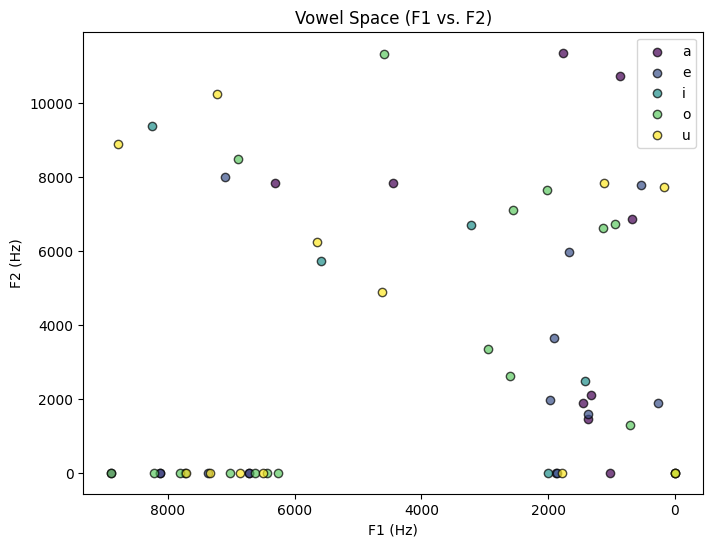

In [9]:
vowels = ['a', 'e', 'i', 'o', 'u']
colors = plt.cm.get_cmap('viridis', len(vowels))
    
plt.figure(figsize=(8, 6))
for idx, vowel in enumerate(vowels):
    idxs = [i for i, tm in enumerate(vow_data) if vowel_map[tm[-1]] == vowel]
    
    tmp = [vow_data[i] for i in idxs]
    
    F1 = [extract_formants(i[1][:, i[1].shape[1]//2, :], i[2])[0] for i in tmp]
    F2 = [extract_formants(i[1][:, i[1].shape[1]//2, :], i[2])[1] for i in tmp]
    plt.scatter(F1, F2, color=colors(idx), label=vowel, alpha=0.7, edgecolor='k')
    
plt.xlabel("F1 (Hz)")
plt.ylabel("F2 (Hz)")
plt.title("Vowel Space (F1 vs. F2)")
plt.legend()
plt.gca().invert_xaxis()  # Invert F1 axis per conventional vowel plots
plt.show()

Training

In [10]:
train_dat, test_dat = train_test_split(vow_data, test_size=0.2, random_state=45)

In [11]:
vow_clss = KNNVowelClassifier(k=3)

In [12]:
vow_clss.train(train_dat)

In [13]:
accuracy, f1, conf_mat = vow_clss.evaluate(test_dat)

In [14]:
accuracy

0.16666666666666666

In [15]:
f1

0.10158730158730159

In [16]:
conf_mat

array([[1, 1, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [3, 1, 0, 1, 0],
       [0, 1, 0, 1, 0]])

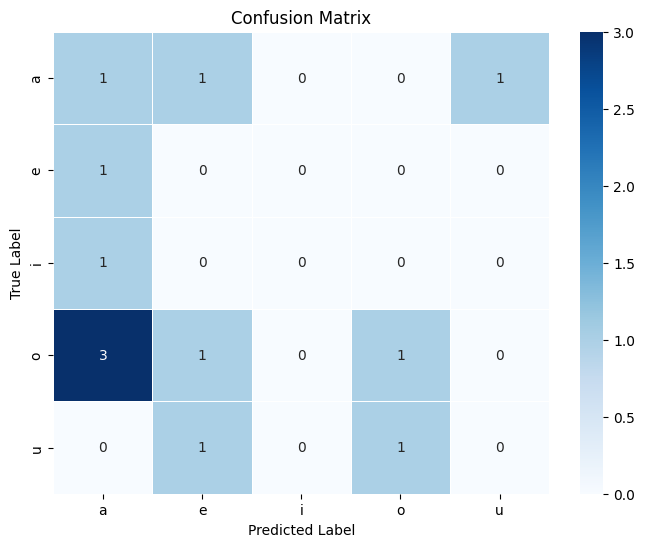

In [17]:
plot_confusion_matrix(conf_mat, vowels)

In [73]:
vow_clss = KNNVowelClassifier(k=20)

In [74]:
vow_clss.train(train_dat)

In [75]:
accuracy, f1, conf_mat = vow_clss.evaluate(test_dat)

In [76]:
accuracy

0.5833333333333334

In [77]:
f1

0.37333333333333335

In [78]:
conf_mat

array([[2, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 4, 0],
       [1, 0, 0, 1, 0]])

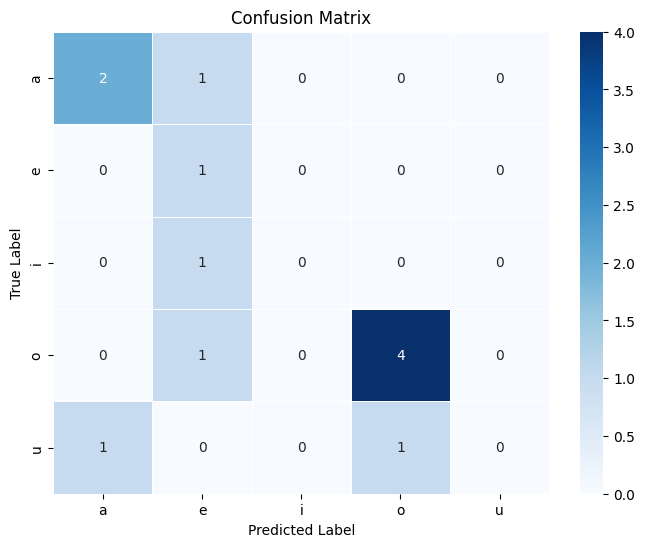

In [79]:
plot_confusion_matrix(conf_mat, vowels)